In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import scipy

Set up the functions we will use to do the analysis and produce the diagrams later on

In [2]:
import requests
def update():
    url='https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
    r = requests.get(url, allow_redirects=True)
    open('covid.csv', 'wb').write(r.content)

In [3]:
import xlrd
import csv

def csv_from_excel():
    wb = xlrd.open_workbook('covid.xlsx')
    sh = wb.sheet_by_name('COVID-19-geographic-disbtributi')
    your_csv_file = open('covid.csv', 'w')
    wr = csv.writer(your_csv_file, quoting=csv.QUOTE_ALL)

    for rownum in range(sh.nrows):
        wr.writerow(sh.row_values(rownum))

    your_csv_file.close()

In [4]:
def isolate_country(name):
    df=pandas.read_csv('covid.csv',error_bad_lines=False)
    df1=df[df.geoId==name][df.cases!=0][['day','month','cases','deaths','popData2018','countryterritoryCode']]
    return df1

In [5]:
def analyze(df1):
    data=pandas.DataFrame.to_numpy(df1)
    total_cases=np.zeros(data[:,0].size)
    total_deaths=np.zeros(data[:,0].size)

    for i in range(data[:,0].size):
        j=data[:,0].size-i-1
        if j==0:
            day=int(data[i,0])
            month=int(data[i,1])
            pop=int(data[i,4])
            name=data[i,5]
        if i==0:
            total_cases[0]=data[j,2]
            total_deaths[0]=data[j,3]
        else:
            total_cases[i]=total_cases[i-1]+data[j,2]
            total_deaths[i]=total_deaths[i-1]+data[j,3]
    cases_per=(total_cases/pop)*1e6
    deaths_per=(total_deaths/pop)*1e6
    return total_cases,total_deaths,cases_per,deaths_per,pop,day,month,name
    
    
    

In [6]:
def basic_diags(df1):
    total_cases,total_deaths,cases_per,deaths_per,pop,day,month,name=analyze(df1)
    x=np.arange(len(total_cases))
    
    plt.plot(x,total_cases)
    plt.scatter(x,total_cases,color='r')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases'])
    plt.show()
    
    plt.plot(x,total_cases)
    plt.scatter(x,total_cases,color='r')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases'])
    plt.show()
    
    plt.plot(x,total_deaths)
    plt.scatter(x,total_deaths,color='r')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Deaths'])
    plt.show()
    
    plt.plot(x,total_deaths)
    plt.scatter(x,total_deaths,color='r')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Deaths'])
    plt.show()
    
    plt.plot(x,total_cases)
    plt.scatter(x,total_cases,color='r')
    plt.plot(x,total_deaths,color='g')
    plt.scatter(x,total_deaths,color='purple')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases','Total Deaths'])
    plt.show()
    
    plt.title('Compare by averaging')
    d=np.average(total_cases)/np.average(total_deaths)
    plt.plot(x,total_cases)
    plt.scatter(x,total_cases,color='r')
    plt.plot(x,d*total_deaths,color='g')
    plt.scatter(x,d*total_deaths,color='yellow')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend(['Total Cases','Total Deaths'])
    plt.show()

In [7]:
def compare(df1,df2=pandas.DataFrame(),df3=pandas.DataFrame(),df4=pandas.DataFrame):
    total_cases1,total_deaths1,cases_per1,deaths_per1,pop1,day1,month1,name1=analyze(df1)
    if not df2.empty:
        total_cases2,total_deaths2,cases_per2,deaths_per2,pop2,day2,month2,name2=analyze(df2)
    if not df3.empty:
        total_cases3,total_deaths3,cases_per3,deaths_per3,pop3,day3,month3,name3=analyze(df3)
    if not df4.empty:
        total_cases4,total_deaths4,cases_per4,deaths_per4,pop4,day4,month4,name4=analyze(df4)

    x1=np.arange(len(total_cases1))
    if not df2.empty:
        x2=np.arange(len(total_cases2))
    if not df3.empty:
        x3=np.arange(len(total_cases3))
    if not df4.empty:
        x4=np.arange(len(total_cases4))
    
    
    plt.title('Total Cases per million Linear')
    plt.plot(x1,cases_per1) 
    if not df2.empty:
        plt.plot(x2,cases_per2,color='g')
    if not df3.empty:
        plt.plot(x3,cases_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,cases_per4,color='red')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    plt.title('Total Cases per million Logarithmic')
    plt.plot(x1,cases_per1)
    if not df2.empty:
        plt.plot(x2,cases_per2,color='g')
    if not df3.empty:
        plt.plot(x3,cases_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,cases_per4,color='red')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    
    plt.title('Total Deaths per million Linear')
    plt.plot(x1,deaths_per1) 
    if not df2.empty:
        plt.plot(x2,deaths_per2,color='g')
    if not df3.empty:
         plt.plot(x3,deaths_per3,color='orange')
    if not df4.empty:
         plt.plot(x4,deaths_per4,color='red')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    plt.title('Total Deaths per million Logarithmic')
    plt.plot(x1,deaths_per1)
    if not df2.empty:
        plt.plot(x2,deaths_per2,color='g')
    if not df3.empty:
        plt.plot(x3,deaths_per3,color='orange')
    if not df4.empty:
        plt.plot(x4,deaths_per4,color='red')
    plt.yscale('log')
    plt.grid()
    plt.xlabel('Number of Days since 1st case')
    plt.ylabel('Number of People')
    plt.legend([name1,name2 if not df2.empty else None,name3 if not df3.empty else None,name4 if not df4.empty else None])
    plt.show()
    
    

Explaining the logarithmic scale on the y axis
Let's assume we have an exponential growth $$ y=be^{ax} $$
When this is presented in a logarithmic scale along the y axis we have: $$ y=\log{be^{ax}}=ax\log{be}=c\ x $$
Which looks like a straight line and $c=a\ \log{be}$ is the slope and assuming $b=1$ we have $c=.434\ a$

Update the data file and get the Id codes for every country we have data for

In [8]:
update()

In [9]:
df=pandas.read_csv('covid.csv')
df.drop_duplicates(subset='countryterritoryCode',inplace=True)
print(df[['countryterritoryCode','geoId']].to_string())
index=pandas.DataFrame.to_numpy(df[['geoId','countryterritoryCode']])

     countryterritoryCode geoId
0                     AFG    AF
86                    ALB    AL
113                   AND    AD
132                   DZA    DZ
226                   AGO    AO
240                   NaN    AI
249                   ATG    AG
265                   ARG    AR
294                   ARM    AM
381                   ABW    AW
394                   AUS    AU
490                   AUT    AT
586                   AZE    AZ
675                   BHS    BS
693                   BHR    BH
788                   BGD    BD
809                   BRB    BB
827                   BLR    BY
915                   BEL    BE
1011                  BLZ    BZ
1023                  BEN    BJ
1042                  BMU    BM
1058                  BTN    BT
1080                  BOL    BO
1106                  BIH    BA
1129                  BWA    BW
1133                  BRA    BR
1226                  VGB    VG
1235                  BRN    BN
1260                  BGR    BG
1286    

Get the data for each specific country we want to analyze and compare

In [10]:
greece=isolate_country('EL')
germany=isolate_country('DE')
italy=isolate_country('IT')
china=isolate_country('CN')
spain=isolate_country('ES')
malta=isolate_country('MT')
india=isolate_country('IN')
russia=isolate_country('RU')
turkey=isolate_country('TR')
usa=isolate_country('US')
uk=isolate_country('UK')
portugal=isolate_country('PT')

/home/jannis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Get the basic diagrams for the country we specify

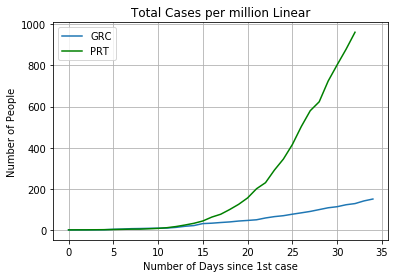

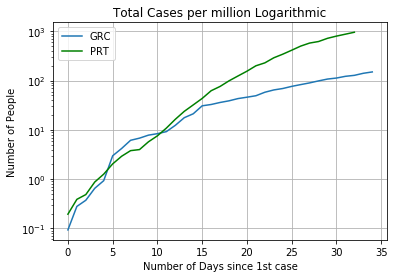

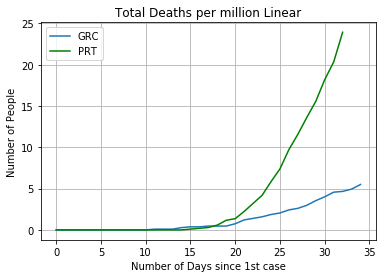

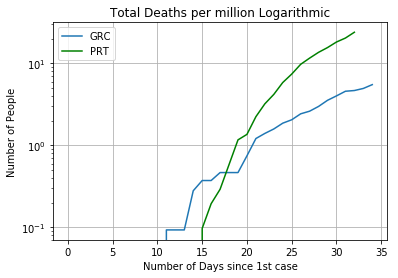

In [11]:
compare(greece,portugal)

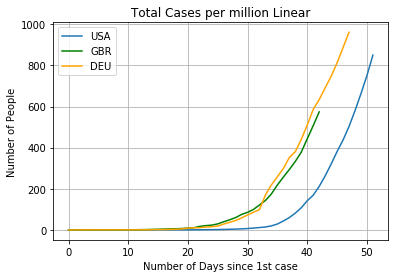

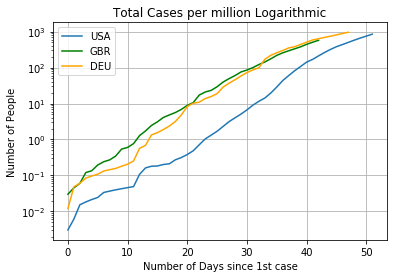

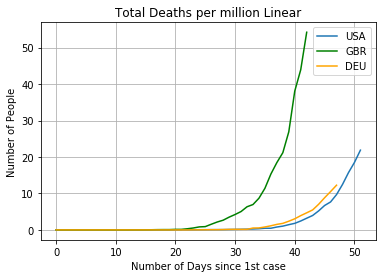

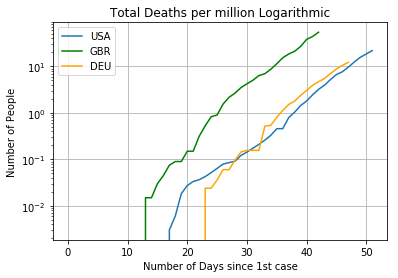

In [12]:
compare(usa,uk,germany)